In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

In [2]:
df2 = pd.read_csv("/Users/vitorkatayama/Downloads/microdados_enem_2023/DADOS/MICRODADOS_ENEM_2023.csv" ,sep = ";", encoding = "latin1")
df2

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933950,210061959676,2023,12,M,1,1,1,1,6,1,...,B,A,A,C,A,B,E,A,A,B
3933951,210061950911,2023,1,F,1,1,2,3,0,1,...,B,A,B,C,B,B,B,B,C,B
3933952,210061965966,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,B
3933953,210061932304,2023,2,M,1,1,1,2,0,3,...,B,B,B,C,A,A,D,A,C,B


In [3]:
# Excluindo as variáveis numero de inscricao e ano da prova

df2.drop(["NU_INSCRICAO", "NU_ANO"], axis = 1, inplace = True)

In [4]:
df2 = df2.dropna()

In [5]:
df2["Q006"].value_counts()

Q006
B    181164
C     98516
D     76527
G     62288
E     58921
F     38190
H     35064
A     27929
I     22312
J     20023
K     16394
Q     15928
N     11892
O     11775
P     11197
L     11062
M      9432
Name: count, dtype: int64

In [6]:
df2.rename({"NU_NOTA_CN": "Ciências da Natureza",
            "NU_NOTA_CH": "Ciências Humanas",
            "NU_NOTA_LC": "Linguagens",
            "NU_NOTA_MT": "Matemática",
            "NU_NOTA_REDACAO": "Redação"}, inplace = True, axis = 1)


/var/folders/g6/m191tfpd6tv1x3lj9g6vcpz00000gn/T/ipykernel_11517/2294834821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename({"NU_NOTA_CN": "Ciências da Natureza",


In [7]:
# Converter a coluna q006 para categórico ordenado

notas = ["Ciências da Natureza", "Ciências Humanas","Linguagens", "Matemática","Redação"]

df2["Q006"] = pd.Categorical(df2["Q006"],ordered= True)


/var/folders/g6/m191tfpd6tv1x3lj9g6vcpz00000gn/T/ipykernel_11517/1613537181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Q006"] = pd.Categorical(df2["Q006"],ordered= True)


In [8]:
notas_por_renda = df2.groupby("Q006")[notas].mean()
round(notas_por_renda,2)

/var/folders/g6/m191tfpd6tv1x3lj9g6vcpz00000gn/T/ipykernel_11517/2429136891.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  notas_por_renda = df2.groupby("Q006")[notas].mean()


,Ciências da Natureza,Ciências Humanas,Linguagens,Matemática,Redação
Q006,,,,,
A,448.31,471.78,471.62,459.59,532.95
B,460.26,487.39,487.52,480.84,568.62
C,480.21,511.73,510.53,516.70,611.42
D,491.88,524.43,521.54,537.24,636.03
E,501.62,533.88,529.61,554.25,655.84
F,510.22,542.65,536.57,572.23,672.61
G,519.65,550.85,543.10,586.39,691.73
H,531.30,560.84,551.03,605.84,712.65
I,537.03,566.65,555.29,616.07,727.15


##  Q006 - Renda mensal
Com base nos dados do Enem 2023, disponíveis no site do Ministério da Educação, foi feita uma análise para verificar a relação entre a renda mensal familiar dos candidatos e o desempenho deles no exame. As informações sobre a renda foram obtidas no questionário socioeconômico, na questão 6 (Q006). De acordo com as respostas dos participantes, eles foram divididos em 17 categorias - de A a Q -, em que a categoria A corresponde à menor faixa de renda e Q à maior.



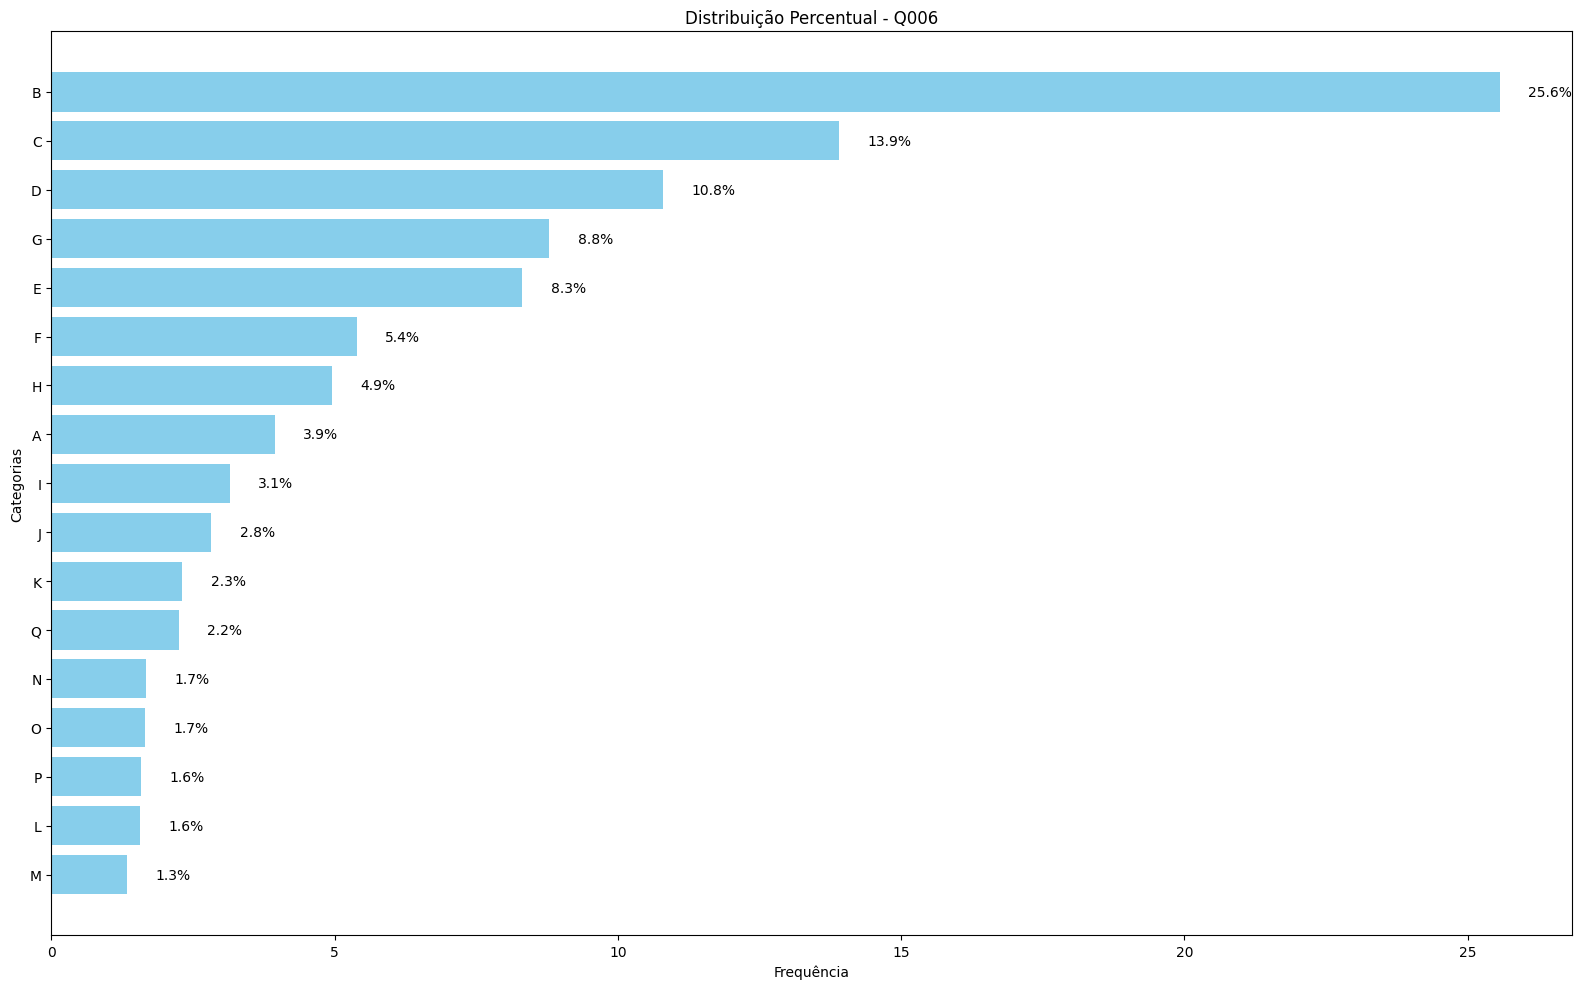

In [9]:
## Frequencia das classes


frequencia = df2["Q006"].value_counts()

percentual = (frequencia/ frequencia.sum()) * 100

percentual = percentual.sort_values(ascending = False)



plt.figure(figsize= (16,10))

bars = plt.barh(percentual.index, percentual.values, color = "skyblue")

for bar, value in zip(bars, percentual.values):
    plt.text(
        bar.get_width() + 0.5,  # Posição no eixo X
        bar.get_y() + bar.get_height() / 2,  # Centraliza no eixo Y
        f"{value:.1f}%",  # Formato do valor percentual
        va="center"  # Alinha verticalmente
    )
plt.xlabel("Frequência")
plt.ylabel("Categorias")
plt.title("Distribuição Percentual - Q006")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Do gráfico de barras horizontais, observa-se que a maior parte dos candidados - 67,4 % - pertencem às categorias B, C, D, G e E. Nelas a renda mensal está no intervalo de R$ 1 a R$ 5280 . As famílias que ganham mais de R$ 10.560 (de L a Q) possuem distribuições semelhantes.
As classes são dadas por:
- A: Nenhuma Renda  

- B: Até R$ 1320

- C: De R$ 1320 até R$ 1980

- D: De R$ 1980,01 até R$ 2640

- E: De R$ 2640,01 até R$ 3300

- F: De R$ 3300,01 até R$ 3960

- G: De R$ 3960,01 até R$ 5280

- H: De R$ 5280,01 até R$ 6600

- I: De R$ 6600,01 até R$ 7290

- J: De R$ 7290,01 até R$ 9240

- K: De R$ 9240,01 até R$ 10560

- L: De R$ 10560,01 até R$ 11800

- M: De R$ 11880,01 até R$ 13200

- N: De R$ 13200,01 até R$ 15840

- O: De R$ 15840,01 até R$ 19800

- P: De R$ 19800,01 até R$ 26400

- Q: Acima de R$ 26400

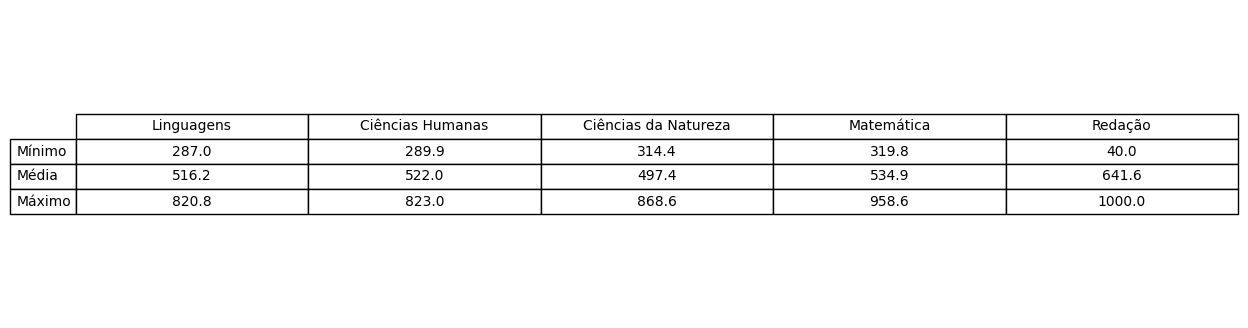

In [10]:
notas_enem = {"Linguagens": [287,516.2,820.8],
              "Ciências Humanas": [289.9,522,823],
              "Ciências da Natureza": [314.4,497.4,868.6],
              "Matemática": [319.8,534.9, 958.6],
              "Redação": [40, 641.6, 1000]}

df_enem = pd.DataFrame(
    notas_enem, 
    index=["Mínimo", "Média", "Máximo"]  # Define os rótulos das linhas
)

# Criando a tabela
fig, ax = plt.subplots(figsize=(10, 4))  # Aumenta o tamanho para acomodar texto
ax.axis("off")  # Remove os eixos
tabela = ax.table(
    cellText=df_enem.values,  # Valores da tabela
    rowLabels=df_enem.index,  # Rótulos das linhas
    colLabels=df_enem.columns,  # Rótulos das colunas
    cellLoc="center",  # Centraliza o texto
    loc="center",  # Coloca a tabela no centro
)

# Ajustando tamanho das células
tabela.auto_set_font_size(False)  # Permite ajuste manual do tamanho da fonte
tabela.set_fontsize(10)  # Define tamanho da fonte
tabela.scale(1.5, 1.5)  # Ajusta o tamanho da tabela

# Salva como imagem e exibe
plt.show()

De acordo com os dados do Inep, as notas mínimas, médias e máximas em cada área foram:
- Linguagens: 287; 516,2 e 820,8
- Ciências Humanas: 289,9; 522 e 823
- Ciências da Natureza: 314,4; 497,4 e 868,6 
- Matemática: 319,8; 534,9 e 958,6
- Redação: 40; 641,6 e 1000



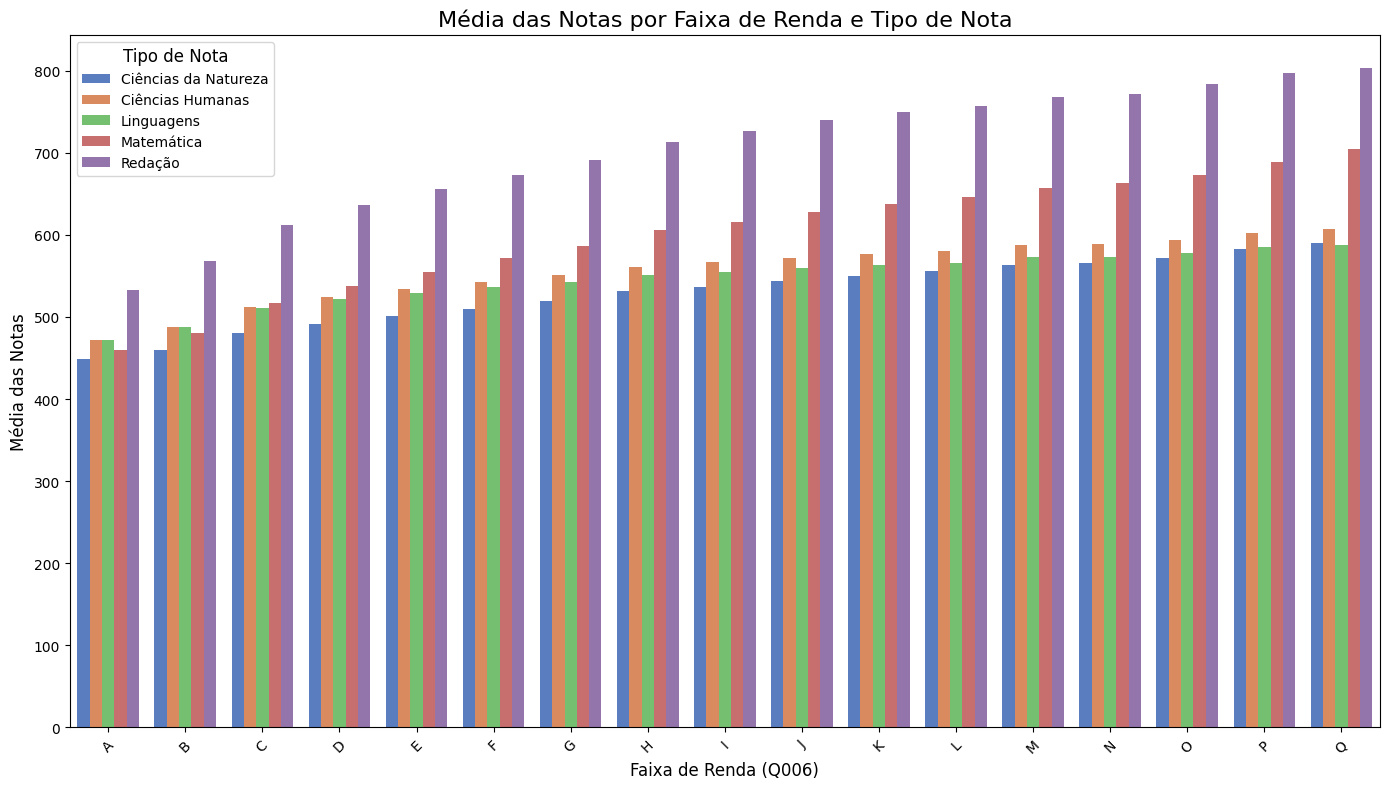

In [11]:
notas_long = notas_por_renda.reset_index().melt(id_vars="Q006", 
                                                var_name="Tipo de Nota", 
                                                value_name="Média")

plt.figure(figsize=(14, 8))  
sns.barplot(data=notas_long, x="Q006", y="Média", hue="Tipo de Nota", palette="muted")

plt.title("Média das Notas por Faixa de Renda e Tipo de Nota", fontsize=16)
plt.xlabel("Faixa de Renda (Q006)", fontsize=12)
plt.ylabel("Média das Notas", fontsize=12)
plt.xticks(rotation=45) 
plt.legend(title="Tipo de Nota", fontsize=10, title_fontsize=12)
plt.tight_layout()

plt.show()

Do gráfico e da tabela, observa-se que os alunos das categorias A,B,C e D possuem a nota menor do que a média em todas as áreas. Essa padrão é alterado a partir da E. Conforme a maior renda mensal, é perceptivel o aumento das notas médias - sobretudo-  em matemática e redação.